## Exercise 3 - **Volcanic bomb**

The goal of this exercise is to consolidate:
- code structure `# Physics, # Numerics, # Time loop, # Visualisation`
- array initialisation
- update rule
- `if` condition

You will now simulate the trajectory of a [volcanic bomb](https://en.wikipedia.org/wiki/Volcanic_bomb) that got ejected during a volcanic eruption. The ejection speed is given by the horizontal and vertical velocity components
$$
V_x = \frac{\partial x}{\partial t}\\[10pt]
V_y = \frac{\partial y}{\partial t}
$$

Once ejected, the volcanic bomb is subject to gravity acceleration $g$. Air friction will be neglected. Acceleration being defined as the change of velocity over time, we obtain the following update rule:
$$
\frac{\partial V_y}{\partial t}=-g
$$

These equations define a mathematical model describing the kinematics of the volcanic bomb. You may remember from your studies how to solve those equation analytically; however we'll here focus on a numerical solution using a similar approach as for the previous exercises. The $x$ and $y$ location of the bomb as function of time can be obtained based on updating previous values using the definition of velocity:
$$
x_{t+\Delta t} = x_{t} + V_x    \Delta t~,\\[5pt]
y_{t+\Delta t} = y_{t} + V_y(t) \Delta t~.
$$
And because of gravity acceleration, the $V_y$ velocity evolution can be obtained according to
$$
V_{y,t+\Delta t} = V_{y,t} - g \Delta t~.
$$

The 3 equations above represent the discretised form of the 3 first equations and should be used to solve the problem numerically. The initial position of the volcanic bomb $(x_0, y_0)=(0,480)$ m. The magnitude of the ejection speed is of 120 m/s and the angle $\alpha = 60°$. The simulation stops when the volcanic bomb touches the ground ($y=0$).

> 💡 hint:
> - Modify the code from exercise 3 to, in addition, account for the change of `Vy` with time
> - Use e.g. a `break` statement to exit the loop once the bomb hits the ground

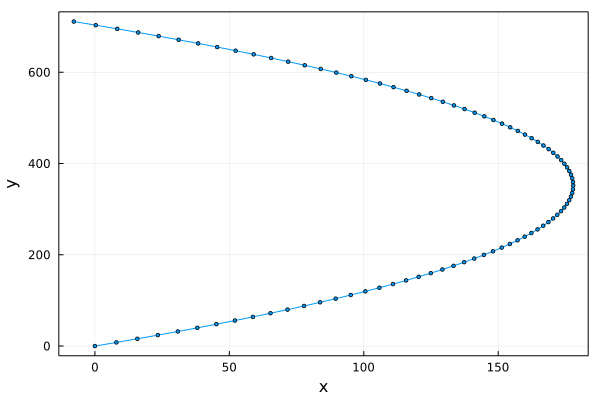

In [7]:
using Plots

@views function vulcano_bomb(dt)
    # Physical parameters
    V0    = 113/√2*[1.,1]  # initial speed, km/h
    Lx    = 200  # length of segment, km
    ttot = 10    # total time, h
    # Numerical parameters
    # dt    = 0.1            # time step, h
    nt    = Int(cld(ttot, dt))  # number of time steps
    # Array initialisation
    V = zeros(2,nt)
    V[:,1] = V0
    T     = range(0,ttot,nt)
    X     = zeros(2,nt)
    g = -9.18
    # Time loop
    for it = 2:nt
        @. V[:,it] = V[:,it-1] + dt*g*[2,0]
        # T[it] = T[it-1] + dt
        X[:,it] = X[:,it-1] .+ dt.*V[:,it-1]  # move the car, first variable should change the fastest for julia arrays
        if X[1,it] <= 0
            X = X[:,1:it]
            break
        end
    end
    # Visualisation
    x = X[1,:]
    y = X[2,:]
    return plot(x,y,marker=2, markersize=5,
                    zlabel="time, hrs", ylabel="y",xlabel="x",
                    framestyle=:box, legend=:none)
end

p1 = vulcano_bomb(0.1)

### Question 1

Report the height of the volcanic bomb at position $x=900$ m away from origin.